# import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       888 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    888 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
df['Survived'].value_counts()

0    547
1    344
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

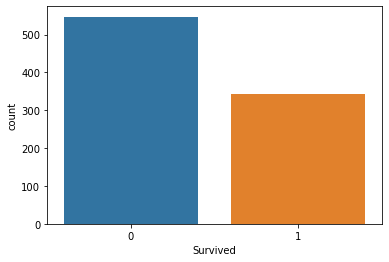

In [7]:
sns.countplot(x= 'Survived', data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

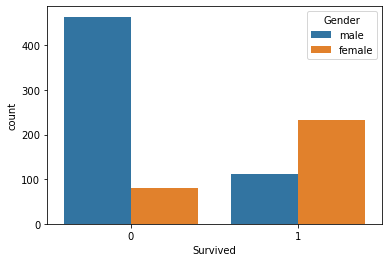

In [8]:
sns.countplot(x= 'Survived', hue = 'Gender', data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

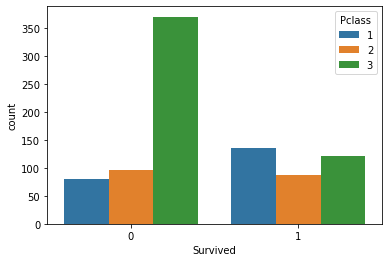

In [9]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df )

In [10]:
df.isna().sum()

Survived      0
Pclass        0
Gender        3
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<AxesSubplot:>

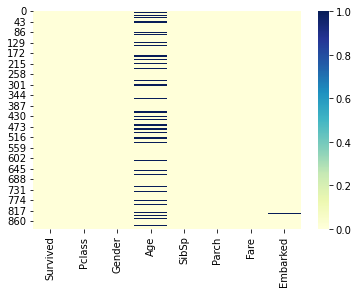

In [11]:
sns.heatmap(df.isna(), cmap = 'YlGnBu')

In [12]:
df['Age'].fillna(df['Age'].median(), inplace = True)

In [13]:
df.isna().sum()

Survived    0
Pclass      0
Gender      3
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [14]:
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
df['Gender'].replace({'male':0,'female':1},inplace = True)

In [16]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,0.0,22.0,1,0,7.2500,S
1,1,1,1.0,38.0,1,0,71.2833,C
2,1,3,1.0,26.0,0,0,7.9250,S
3,1,1,1.0,35.0,1,0,53.1000,S
4,0,3,0.0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0.0,27.0,0,0,13.0000,S
887,1,1,1.0,19.0,0,0,30.0000,S
888,0,3,1.0,28.0,1,2,23.4500,S
889,1,1,0.0,26.0,0,0,30.0000,C


In [17]:
embarked_df = pd.get_dummies(df['Embarked'],drop_first=True)
embarked_df

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [18]:
df = pd.concat([df,embarked_df], axis = 1)

In [19]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Q,S
0,0,3,0.0,22.0,1,0,7.2500,S,0,1
1,1,1,1.0,38.0,1,0,71.2833,C,0,0
2,1,3,1.0,26.0,0,0,7.9250,S,0,1
3,1,1,1.0,35.0,1,0,53.1000,S,0,1
4,0,3,0.0,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0.0,27.0,0,0,13.0000,S,0,1
887,1,1,1.0,19.0,0,0,30.0000,S,0,1
888,0,3,1.0,28.0,1,2,23.4500,S,0,1
889,1,1,0.0,26.0,0,0,30.0000,C,0,0


In [20]:
df.drop(['Embarked'], axis = 1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    888 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
dtypes: float64(3), int64(4), uint8(2)
memory usage: 50.6 KB


In [22]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
dtypes: float64(3), int64(4), uint8(2)
memory usage: 50.6 KB


In [24]:
x = df.drop('Survived', axis = 1)
y = df['Survived']

In [25]:
x

,Pclass,Gender,Age,SibSp,Parch,Fare,Q,S
0,3,0.0,22.0,1,0,7.2500,0,1
1,1,1.0,38.0,1,0,71.2833,0,0
2,3,1.0,26.0,0,0,7.9250,0,1
3,1,1.0,35.0,1,0,53.1000,0,1
4,3,0.0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,0.0,27.0,0,0,13.0000,0,1
887,1,1.0,19.0,0,0,30.0000,0,1
888,3,1.0,28.0,1,2,23.4500,0,1
889,1,0.0,26.0,0,0,30.0000,0,0


In [26]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [29]:
y.value_counts()

0    547
1    344
Name: Survived, dtype: int64

In [30]:
344/547

0.6288848263254113

In [31]:
y_test.value_counts()

0    110
1     69
Name: Survived, dtype: int64

In [32]:
69/110

0.6272727272727273

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [34]:
y.value_counts()

0    547
1    344
Name: Survived, dtype: int64

In [35]:
344/547

0.6288848263254113

In [36]:
y_test.value_counts()

0    105
1     74
Name: Survived, dtype: int64

In [37]:
74/105

0.7047619047619048

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

# Model Building

In [39]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred = log_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0], dtype=int64)

In [41]:
y_test

200    0
812    0
825    0
50     0
286    1
      ..
302    0
417    1
373    0
520    1
743    0
Name: Survived, Length: 179, dtype: int64

In [42]:
y_pred[10:15]

array([0, 0, 1, 0, 0], dtype=int64)

In [43]:
y_test[10:15]

355    0
388    0
299    1
77     0
607    1
Name: Survived, dtype: int64

In [44]:
y_pred[30:35]

array([0, 1, 0, 0, 1], dtype=int64)

In [45]:
y_test[30:35]

93     0
369    1
636    0
610    0
700    1
Name: Survived, dtype: int64

# Accuracy

In [46]:
accuracy_score(y_test,y_pred)

0.7932960893854749

In [47]:
confusion_matrix(y_test,y_pred)

array([[92, 18],
       [19, 50]], dtype=int64)

In [48]:
(92+50)/(92+50+18+19)

0.7932960893854749

In [49]:
clf_report = classification_report(y_test,y_pred)

In [50]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       110
           1       0.74      0.72      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [51]:
y_pred_prob = log_model.predict_proba(x_test)

In [52]:
# y_pred_prob

In [53]:
# y_pred_prob

In [54]:
y_pred_prob[:,1]

array([0.12080949, 0.2145064 , 0.16105386, 0.07294356, 0.11419171,
       0.55824969, 0.58650961, 0.89795373, 0.08138314, 0.49468011,
       0.12080949, 0.1616823 , 0.95378172, 0.11989463, 0.49520979,
       0.26352378, 0.05590422, 0.86294364, 0.62652362, 0.60907078,
       0.88124581, 0.64821867, 0.06631446, 0.41801476, 0.31080083,
       0.06102726, 0.14754892, 0.16749788, 0.99492474, 0.94207301,
       0.07263674, 0.95207714, 0.10699182, 0.26036953, 0.9785464 ,
       0.711801  , 0.93841778, 0.516871  , 0.20632046, 0.80823168,
       0.12378234, 0.1616991 , 0.90111838, 0.11554084, 0.1072412 ,
       0.65928308, 0.11979769, 0.93306365, 0.7463471 , 0.53353696,
       0.52587588, 0.14913615, 0.867919  , 0.42859089, 0.86965475,
       0.5412345 , 0.14582592, 0.1091541 , 0.67071102, 0.92732577,
       0.76973972, 0.09532349, 0.91445645, 0.76013543, 0.57429911,
       0.6530457 , 0.14150542, 0.06884111, 0.0874428 , 0.14103851,
       0.09545206, 0.27609836, 0.66438125, 0.12439943, 0.08829

In [55]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])

In [56]:
print(fpr,len(fpr))

[0.         0.         0.         0.01818182 0.01818182 0.02727273
 0.02727273 0.03636364 0.03636364 0.05454545 0.05454545 0.06363636
 0.06363636 0.07272727 0.07272727 0.11818182 0.11818182 0.12727273
 0.12727273 0.14545455 0.14545455 0.16363636 0.16363636 0.16363636
 0.17272727 0.18181818 0.18181818 0.19090909 0.19090909 0.2
 0.2        0.43636364 0.43636364 0.44545455 0.46363636 0.50909091
 0.50909091 0.52727273 0.52727273 0.54545455 0.54545455 0.6
 0.61818182 0.67272727 0.67272727 0.69090909 0.72727273 0.75454545
 0.75454545 0.77272727 0.77272727 0.8        0.80909091 0.82727273
 0.82727273 0.94545455 0.94545455 1.        ] 58


In [57]:
print(tpr,len(tpr))

[0.         0.01449275 0.39130435 0.39130435 0.43478261 0.43478261
 0.44927536 0.44927536 0.50724638 0.50724638 0.57971014 0.57971014
 0.60869565 0.60869565 0.62318841 0.62318841 0.63768116 0.63768116
 0.71014493 0.71014493 0.72463768 0.72463768 0.73913043 0.76811594
 0.7826087  0.7826087  0.79710145 0.79710145 0.8115942  0.8115942
 0.82608696 0.82608696 0.84057971 0.84057971 0.84057971 0.84057971
 0.86956522 0.88405797 0.89855072 0.89855072 0.91304348 0.91304348
 0.91304348 0.91304348 0.92753623 0.92753623 0.92753623 0.92753623
 0.94202899 0.94202899 0.95652174 0.95652174 0.97101449 0.97101449
 0.98550725 0.98550725 1.         1.        ] 58


In [58]:
print(threshold, len(threshold))

# Threshold[0] = 1 + 0.99492473
# threshold[0] = 1 + max[threshold]

[1.99492474 0.99492474 0.80823168 0.79697966 0.76973972 0.76013543
 0.7463471  0.73329007 0.68808816 0.67071102 0.6530457  0.64821867
 0.64015724 0.62652362 0.61086569 0.60410661 0.6025045  0.599319
 0.55824969 0.5412345  0.53353696 0.516871   0.49520979 0.49468011
 0.4813537  0.45721363 0.45317996 0.42859089 0.41801476 0.37066204
 0.35898565 0.16749788 0.16653055 0.16227212 0.1616991  0.1600033
 0.15741918 0.15385173 0.15366104 0.14913615 0.14818135 0.14256153
 0.14150542 0.12378234 0.12313996 0.12080949 0.11989463 0.11554084
 0.11484374 0.11444566 0.11419171 0.10705893 0.10699182 0.10360123
 0.09941005 0.06631446 0.06547267 0.04210158] 58


In [59]:
1 + 0.99492473

1.9949247300000001

Text(0, 0.5, 'TPR')

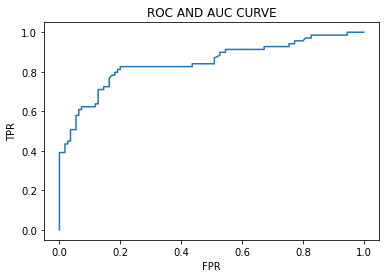

In [60]:
plt.title('ROC AND AUC CURVE')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [61]:
roc_auc_score(y_test,y_pred_prob[:,1])

0.8455862977602108